In [1]:
import praw
import collections
import seaborn as sns

<H1>List of ABC's The Bachelorette Contestants</H1>

In [2]:
menList = [
    'brian',
    'cam',
    'chasen',
    'connor j',
    'connor s',
    'daron',
    'devin',
    'dustin',
    'dylan',
    'garret',
    'grant',
    'hunter',
    'jed',
    'joe',
    'joey',
    'john paul jones',
    'jpj',
    'jonathan',
    'kevin',
    'luke p',
    'luke s',
    'matt donald',
    'matteo',
    'matthew',
    'mike',
    'peter',
    'ryan',
    'scott',
    'thomas',
    'tyler c',
    'tyler g',
    ];

# create list of counter variables
cnts = [0]*len(menList)

# zip into dictionary
menDict = dict(zip(menList, cnts))

<H1> Parse TheBachelor Subreddit for Posts </H1>

In [3]:
reddit = praw.Reddit(client_id='', client_secret='', user_agent='')

In [4]:
# get hottest posts from all subreddits
hot_posts = reddit.subreddit('TheBachelor').hot(limit=1000)
# loop over all men's names in the title of all posts
for post in hot_posts:
    for man, cnt in menDict.items():
        if man in post.title.lower():
            menDict[man] = menDict[man] + 1
    

In [5]:
# Correct for John Paul Jones nickname
menDict['john paul jones'] = menDict['john paul jones'] + menDict.pop('jpj', 0)
# sort the dictionary
sortedMen = sorted(menDict.items(), key=lambda kv: kv[1], reverse=True)
sortedDict = collections.OrderedDict(sortedMen)

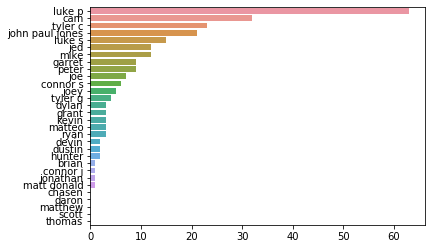

In [6]:
ax = sns.barplot(x=list(sortedDict.values()), y=list(sortedDict.keys()))

In [7]:
menDict.items()

dict_items([('brian', 1), ('cam', 32), ('chasen', 0), ('connor j', 1), ('connor s', 6), ('daron', 0), ('devin', 2), ('dustin', 2), ('dylan', 3), ('garret', 9), ('grant', 3), ('hunter', 2), ('jed', 12), ('joe', 7), ('joey', 5), ('john paul jones', 21), ('jonathan', 1), ('kevin', 3), ('luke p', 63), ('luke s', 15), ('matt donald', 1), ('matteo', 3), ('matthew', 0), ('mike', 12), ('peter', 9), ('ryan', 3), ('scott', 0), ('thomas', 0), ('tyler c', 23), ('tyler g', 4)])